In [1]:
import numpy as np
import pandas as pd
import seaborn as sns # Data Visualization Package (DA Friendly)
#Below line is mandatory if you are planning to visualize graph in Jupyter notebook
%matplotlib inline

In [2]:
dataset = pd.DataFrame([[1000],[5000],[2000],[4000],[6000],[9000],[100000000],[20000000]] , columns=['sal'])

In [3]:
dataset

sal
0       1000
1       5000
2       2000
3       4000
4       6000
5       9000
6  100000000
7   20000000

In [8]:
# Checking the distribution of the data using Numerical Data
dataset['sal'].describe()

# To identify if there exists any outlier, check mean and 50% value
# if the value is significantly far, we can conclude outliers are present in the data

count    8.000000e+00
mean     1.500338e+07
std      3.504933e+07
min      1.000000e+03
25%      3.500000e+03
50%      5.500000e+03
75%      5.006750e+06
max      1.000000e+08
Name: sal, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


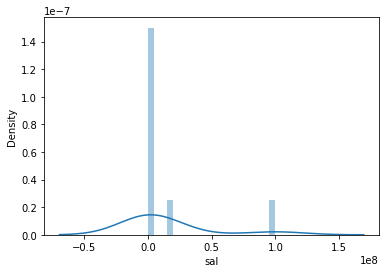

In [4]:
#Use Visual EDA to figure out the nature/Distribution of the data
sns.distplot(dataset['sal'])

In [5]:
dataset['sal'].mean()

15003375.0

In [6]:
#From my visual EDA , I conclude that the given column is a skewed colum
# This needs to be processed to avoid any unwanted anomalies in my analysis.
# To remove the outliers using Stat method we use 1.5 IQR Rule


In [9]:
np.percentile(dataset['sal'], [25,75])

array([3.50000e+03, 5.00675e+06])

In [11]:
# Create a function that can detect outliers using 1.5 IQR rule

def outlierDetection(columnData):
  #1. Sort the data in asc order
  sorted(columnData)
  
  #2. Get Q1 and Q3
  Q1,Q3 = np.percentile(columnData , [25,75])

  #3. Calc IQR
  IQR = Q3 - Q1

  #4. Calc Lower range
  lr = Q1 - (1.5 * IQR)

  #5. Calc Upper Range
  ur = Q3 + (1.5 * IQR)

  return lr,ur


In [12]:
#Implement Function

lowerRange,upperRange = outlierDetection(dataset['sal'])

In [13]:
#Delete Outliers
processedData = dataset[(dataset['sal'] >= lowerRange) & (dataset['sal'] <= upperRange)]
processedData

sal
0  1000
1  5000
2  2000
3  4000
4  6000
5  9000

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


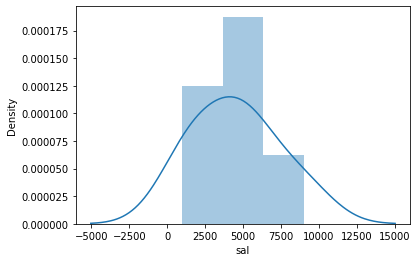

In [14]:
sns.distplot(processedData['sal'])

In [15]:
processedData['sal'].describe()

count       6.000000
mean     4500.000000
std      2880.972058
min      1000.000000
25%      2500.000000
50%      4500.000000
75%      5750.000000
max      9000.000000
Name: sal, dtype: float64

In [16]:
processedData['sal'].mean()

4500.0